In [42]:
!pip install bs4

In [43]:
!pip install pandas

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [45]:
#the url where we can find the reviews especially for BA from the website skytrax
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
#number of pages we want to scrap(can be changed)
pages = 10
#number of reviews we want to scrap(can be changed)
page_size = 100
#empty list to store reviews
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    #to print total number of reviews collected
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [46]:
#creating dataframe
df = pd.DataFrame()
#adding reviews to dataframe
df["reviews"] = reviews
#viewing dataframe
df.head()

,reviews
0,✅ Trip Verified | My family and I were booke...
1,Not Verified | We had to change from AA to BA...
2,✅ Trip Verified | After paying $6500 for ticke...
3,✅ Trip Verified | An excellent flight on BA Ci...
4,✅ Trip Verified | Crew were amazing and atte...


In [47]:
#saving df as a csv file 
df.to_csv('reviews.csv', index=False)
#now we have dataset for our project

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [49]:
#DATA CLEANING:

In [50]:
!pip install wordcloud

In [51]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer


LOAD AND INSPECT THE DATA

Descriptive Statistics: Provides insights into the distribution of review lengths.

Review Length Distribution: Visualizes how review lengths change before and after cleaning.

Common Words: Helps in understanding the most frequently used words in the dataset.

Sentiment Distribution: Allows us to see the spread of sentiment scores.

Patterns or Anomalies: Helps identify any extremes or patterns in the reviews.

In [52]:
# Load the dataset
df = pd.read_csv('reviews.csv')

# Display basic information
print(df.info())

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None


,reviews
0,✅ Trip Verified | My family and I were booke...
1,Not Verified | We had to change from AA to BA...
2,✅ Trip Verified | After paying $6500 for ticke...
3,✅ Trip Verified | An excellent flight on BA Ci...
4,✅ Trip Verified | Crew were amazing and atte...


A) DATA CLEANING

In [53]:
# Define a function to clean the text
def clean_text(text):
    # Remove '✅ Trip Verified |' and 'Not Verified |' tags
    text = re.sub(r'✅ Trip Verified \| |Not Verified \| ', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

# Apply the cleaning function to the reviews
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# Display the cleaned reviews
df[['reviews', 'cleaned_reviews']].head()


,reviews,cleaned_reviews
0,✅ Trip Verified | My family and I were booke...,my family and i were booked to leave london fo...
1,Not Verified | We had to change from AA to BA...,we had to change from aa to ba for a flight to...
2,✅ Trip Verified | After paying $6500 for ticke...,after paying for tickets for my family includ...
3,✅ Trip Verified | An excellent flight on BA Ci...,an excellent flight on ba cityflyer the plane ...
4,✅ Trip Verified | Crew were amazing and atte...,crew were amazing and attentive nothing was mi...


A.1. REMOVE STOPWORDS

In [54]:
#optional but a good practice

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the cleaned reviews
df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_stopwords)

# Display the cleaned and stopwords-removed reviews
df[['reviews', 'cleaned_reviews']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karis_h66oqv0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karis_h66oqv0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviews,cleaned_reviews
0,✅ Trip Verified | My family and I were booke...,family booked leave london hong kong august ma...
1,Not Verified | We had to change from AA to BA...,change aa ba flight london missed connection f...
2,✅ Trip Verified | After paying $6500 for ticke...,paying tickets family including pay sit togeth...
3,✅ Trip Verified | An excellent flight on BA Ci...,excellent flight ba cityflyer plane clean comf...
4,✅ Trip Verified | Crew were amazing and atte...,crew amazing attentive nothing missed definite...


B) DATA ANALYSIS

B.1. Topic Modeling

In [55]:
# Vectorize the cleaned reviews
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_reviews'])

# Apply LDA for topic modeling
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

# Display the top words for each topic
for i, topic in enumerate(LDA.components_):
    print(f"Top 10 words for topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")


Top 10 words for topic #0:
['business', 'seat', 'seats', 'food', 'class', 'service', 'ba', 'cabin', 'crew', 'flight']


Top 10 words for topic #1:
['ticket', 'airline', 'ba', 'travel', 'service', 'customer', 'refund', 'flight', 'airways', 'british']


Top 10 words for topic #2:
['check', 'told', 'heathrow', 'airport', 'time', 'london', 'service', 'hours', 'ba', 'flight']


Top 10 words for topic #3:
['service', 'good', 'food', 'economy', 'flight', 'business', 'seats', 'ba', 'class', 'seat']


Top 10 words for topic #4:
['club', 'staff', 'cabin', 'service', 'food', 'ba', 'time', 'crew', 'good', 'flight']




B.2. Sentiment Analysis

In [56]:
import nltk
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the cleaned reviews
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display the sentiment scores
df[['reviews', 'cleaned_reviews', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\karis_h66oqv0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,cleaned_reviews,sentiment
0,✅ Trip Verified | My family and I were booke...,family booked leave london hong kong august ma...,-0.8979
1,Not Verified | We had to change from AA to BA...,change aa ba flight london missed connection f...,-0.3597
2,✅ Trip Verified | After paying $6500 for ticke...,paying tickets family including pay sit togeth...,0.7783
3,✅ Trip Verified | An excellent flight on BA Ci...,excellent flight ba cityflyer plane clean comf...,0.9877
4,✅ Trip Verified | Crew were amazing and atte...,crew amazing attentive nothing missed definite...,0.8941


B.3. word cloud

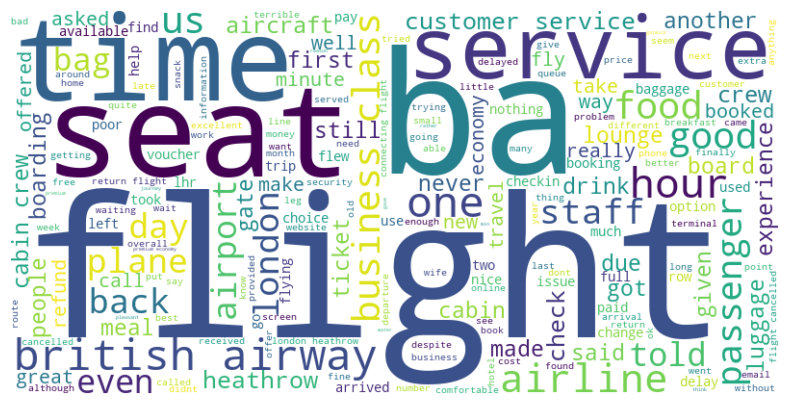

In [57]:
# Combine all reviews into one string
text = ' '.join(df['cleaned_reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [58]:
# Save the cleaned dataset
df.to_csv('cleaned_reviews.csv', index=False)


C) INSPECT DEEPER BEFORE AND AFTER CLEANING

C.1. DESCRIPTIVE STATISTICS

In [59]:
# Add a column for the length of each review
df['review_length'] = df['reviews'].apply(len)
df['cleaned_review_length'] = df['cleaned_reviews'].apply(len)

# Descriptive statistics of review lengths
review_length_stats = df['review_length'].describe()
cleaned_review_length_stats = df['cleaned_review_length'].describe()

review_length_stats, cleaned_review_length_stats


(count    1000.000000
 mean      858.180000
 std       595.858096
 min       148.000000
 25%       443.000000
 50%       697.000000
 75%      1074.250000
 max      3492.000000
 Name: review_length, dtype: float64,
 count    1000.000000
 mean      537.538000
 std       373.699049
 min        60.000000
 25%       279.750000
 50%       433.500000
 75%       677.750000
 max      2275.000000
 Name: cleaned_review_length, dtype: float64)

C.2. DISTRIBUTION OF REVIEW LENGTHS

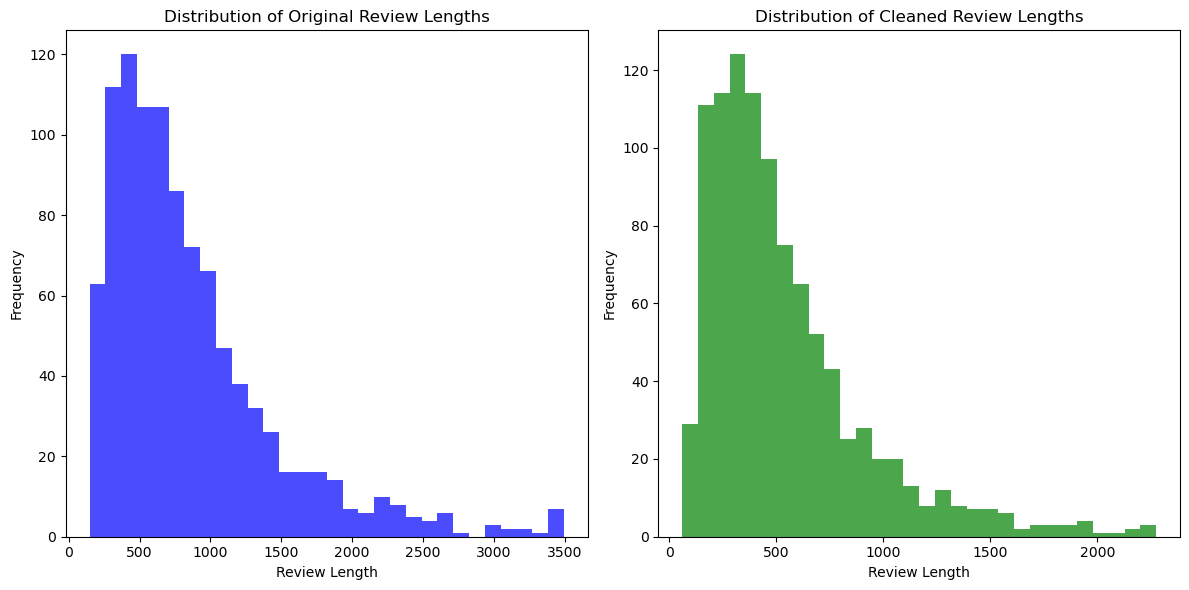

In [61]:
# Plot the distribution of review lengths before and after cleaning
plt.figure(figsize=(12, 6))

# Original Review Lengths
plt.subplot(1, 2, 1)
plt.hist(df['review_length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Original Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')

# Cleaned Review Lengths
plt.subplot(1, 2, 2)
plt.hist(df['cleaned_review_length'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Cleaned Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C.3. COMMON WORDS BEFORE AND AFTER CLEANING

In [65]:
from collections import Counter

# Tokenize and count the most common words in the original reviews
original_words = ' '.join(df['reviews']).split()
original_common_words = Counter(original_words).most_common(20)

# Tokenize and count the most common words in the cleaned reviews
cleaned_words = ' '.join(df['cleaned_reviews']).split()
cleaned_common_words = Counter(cleaned_words).most_common(20)

original_common_words,cleaned_common_words


([('the', 6286),
  ('to', 5485),
  ('and', 4488),
  ('was', 3261),
  ('a', 3212),
  ('I', 3095),
  ('of', 2071),
  ('in', 1962),
  ('for', 1687),
  ('on', 1661),
  ('flight', 1434),
  ('with', 1362),
  ('my', 1219),
  ('that', 1189),
  ('is', 1125),
  ('not', 1122),
  ('The', 1102),
  ('were', 1083),
  ('BA', 1074),
  ('at', 1032)],
 [('flight', 1950),
  ('ba', 1291),
  ('service', 728),
  ('’', 608),
  ('time', 539),
  ('london', 503),
  ('seat', 448),
  ('british', 445),
  ('crew', 445),
  ('class', 442),
  ('airways', 431),
  ('food', 430),
  ('us', 418),
  ('one', 415),
  ('good', 413),
  ('business', 413),
  ('staff', 397),
  ('get', 386),
  ('seats', 386),
  ('would', 383)])

C.4. EXPLORE SENTIMENT DISTRIBUTION

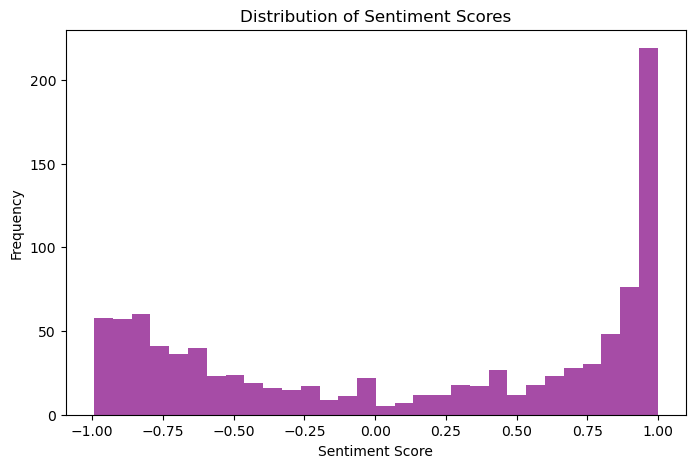

count    1000.000000
mean        0.134595
std         0.749393
min        -0.993600
25%        -0.670500
50%         0.318200
75%         0.909475
max         0.998300
Name: sentiment, dtype: float64

In [66]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of sentiment scores
sentiment_stats = df['sentiment'].describe()
sentiment_stats


C.5. CHECK ANY PATTERNS OR ANOMALIES

In [67]:
# Inspect reviews with the highest and lowest sentiment scores
most_positive_review = df.loc[df['sentiment'].idxmax()]['reviews']
most_negative_review = df.loc[df['sentiment'].idxmin()]['reviews']

most_positive_review, most_negative_review


('✅ Trip Verified |  I was supposed to fly with Aeroflot on the 23rd of December to Moscow. But because Russia has closed its borders, like the majority of other countries, the flight was canceled, and I couldn’t get home. I’ve also tried to fly through Antalya, but the same situation occurred. On my third try, I came to Heathrow and tried to fly away to Cairo. I was declined by another company. Then I went to British Airways. Starting from testing (because Egypt requires tests), as stressful as the whole situation was, the employees were outstanding! (I’m not sure is it connected to BA, but still, I want to mention this). The crew was very helpful and extremely understanding, very professional and urgent to help, they have been a great help and I am very gracious for this. I want to separately point out one employee - Shanell (if I am not mistaken, who works at Collision testing center in Heathrow Terminal 5). She is a savior and most importantly a human, which is very rare nowadays! 

C.6. CORRELATION AND INSIGHTS

In [68]:
# Correlation between review length and sentiment
correlation = df[['cleaned_review_length', 'sentiment']].corr()

# Inspect the first few rows of the most common cleaned reviews
most_common_cleaned_reviews = df['cleaned_reviews'].value_counts().head()

correlation, most_common_cleaned_reviews


(                       cleaned_review_length  sentiment
 cleaned_review_length               1.000000   0.034829
 sentiment                           0.034829   1.000000,
 cleaned_reviews
 family booked leave london hong kong august made wait airport hours told midnight aircraft bee struck lightning flight cancelled everyone sent home scramble find transportation told wait rerouting information booked travel two days later hk via middle east hour stopover needless say refused flight worst trick ba original flight booking references deleted system therefore apply compensation additional transportation hotel meal costs find words express anger much apology received                                                                                                                                                                                                                                                                                                                                        

D) VISUALISATIONS

D.1. WORD FREQUENCY BAR PLOT

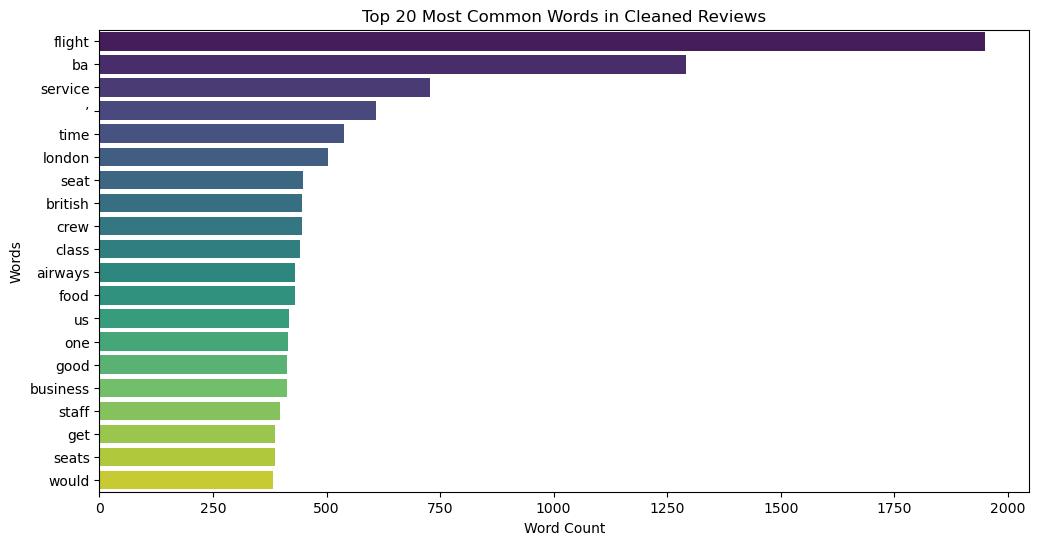

In [71]:
import seaborn as sns
# Tokenize the cleaned reviews and get the most common words
all_words = ' '.join(df['cleaned_reviews']).split()
common_words = Counter(all_words).most_common(20)
words, counts = zip(*common_words)

# Create a bar plot for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Common Words in Cleaned Reviews')
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.show()


D.2. WORD CLOUD

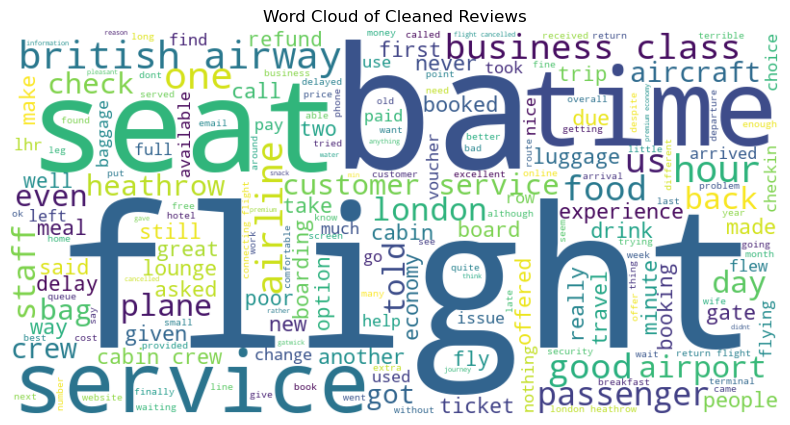

In [72]:
# Combine all cleaned reviews into a single string
text = ' '.join(df['cleaned_reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews')
plt.show()


D.3. SENTIMENT DISTRIBUTION

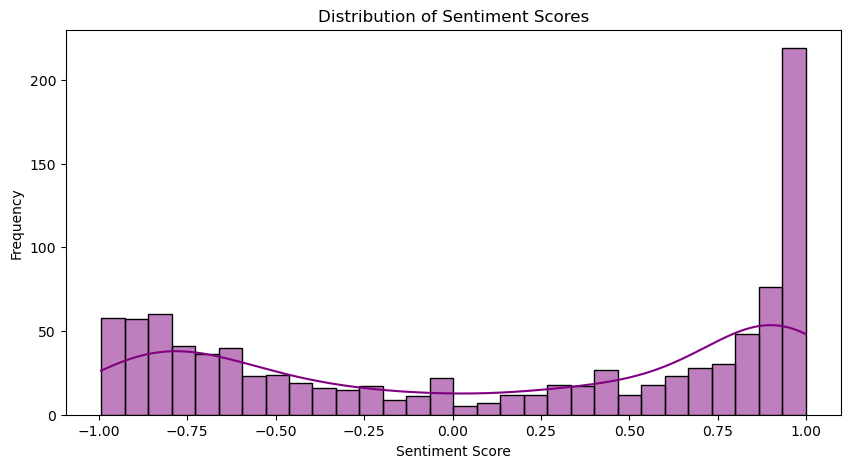

In [73]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


D.4. REVIEW LENGTH DISTRIBUTION

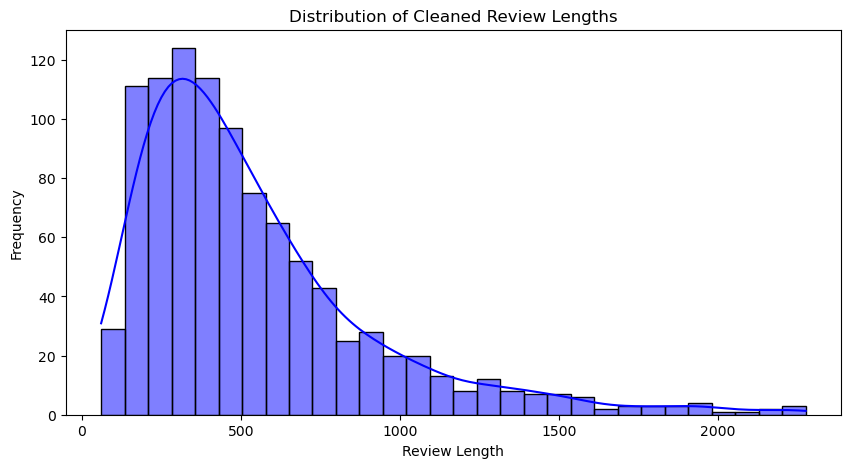

In [74]:
# Plot the distribution of review lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['cleaned_review_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Cleaned Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


D.5. CORRELATION HEATMAP

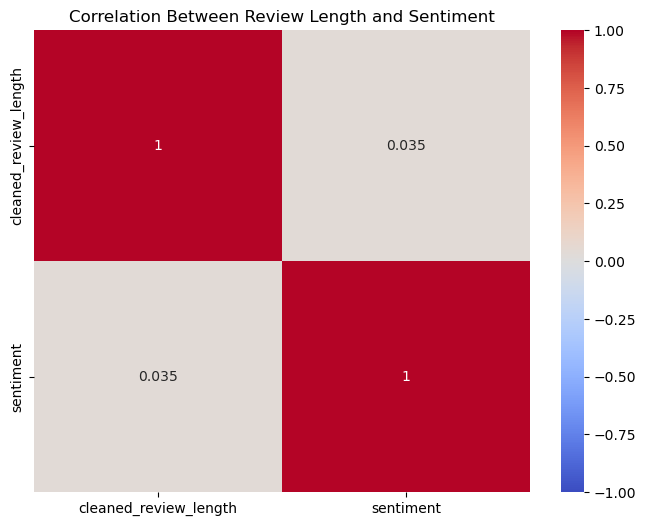

In [76]:
# Calculate correlation matrix
correlation_matrix = df[['cleaned_review_length', 'sentiment']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Review Length and Sentiment')
plt.show()


E) METRICS SUMMARY

In [77]:
# Average length of reviews
avg_review_length = df['cleaned_review_length'].mean()

# Average sentiment score
avg_sentiment = df['sentiment'].mean()

# Number of positive, negative, and neutral reviews
positive_reviews = len(df[df['sentiment'] > 0])
negative_reviews = len(df[df['sentiment'] < 0])
neutral_reviews = len(df[df['sentiment'] == 0])

# Display metrics
print(f"Average Review Length: {avg_review_length:.2f} characters")
print(f"Average Sentiment Score: {avg_sentiment:.2f}")
print(f"Number of Positive Reviews: {positive_reviews}")
print(f"Number of Negative Reviews: {negative_reviews}")
print(f"Number of Neutral Reviews: {neutral_reviews}")


Average Review Length: 537.54 characters
Average Sentiment Score: 0.13
Number of Positive Reviews: 552
Number of Negative Reviews: 441
Number of Neutral Reviews: 7
